In [1]:
from source.util import utils as u
from source import metrics, plots
from source import handshake2, scargc, hs
import sys
import time
import os
import psutil
import resource

In [2]:
poolsize = 150
clusters = 2
n_components = 2
epsilon = 0.1
percent = 30

In [3]:
base = '/home/localuser/Documentos/procopio/tcc/datasets/NOAA.txt'
dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_features = u.criar_datasets(5, base)


Handshake

In [4]:
start = time.time()

predicted, updt = handshake2.handshake2(dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_components, n_features, epsilon, percent)

end = time.time()
mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempo = end - start

SCARGC

In [5]:
startScargc = time.time()

predictedS, updtS = scargc.scargc_1NN(dataset, data_labeled, dataset_train, l_train, stream, l_stream, poolsize, clusters, n_features)

endScargc = time.time()
memS = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempoS = endScargc - startScargc

907


/home/localuser/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [10]:
acc_percent = [[0.50581395 ,0.65697674 ,0.57309942 ,0.5872093  ,0.62573099 ,0.55813953,0.62573099 ,0.50581395 ,0.61988304 ,0.63953488 ,0.6374269  ,0.68604651,0.61988304 ,0.53488372 ,0.64327485 ,0.59302326 ,0.68421053 ,0.62209302  ,0.64912281 ,0.62209302 ,0.60818713 ,0.63953488 ,0.62573099 ,0.56976744  ,0.68023256 ,0.52631579 ,0.6627907  ,0.64327485 ,0.76744186 ,0.67836257  ,0.6744186  ,0.64327485 ,0.70348837 ,0.70760234 ,0.64534884 ,0.60818713  ,0.55813953 ,0.64327485 ,0.55813953 ,0.6374269  ,0.58139535,0.66081871  ,0.55813953 ,0.59649123 ,0.54069767 ,0.66666667 ,0.68604651 ,0.69005848  ,0.62790698 ,0.5872093  ,0.54385965 ,0.63372093 ,0.68421053 ,0.65697674  ,0.64912281 ,0.61627907 ,0.74853801 ,0.59302326 ,0.61403509 ,0.5872093  ,0.59064327 ,0.60465116 ,0.65497076 ,0.56395349 ,0.68421053 ,0.5755814  ,0.54385965 ,0.49418605 ,0.55555556 ,0.65697674 ,0.66666667 ,0.60465116  ,0.66081871 ,0.63372093 ,0.5872093  ,0.64912281 ,0.66860465 ,0.64912281  ,0.55232558 ,0.61988304 ,0.56976744 ,0.60233918 ,0.65116279 ,0.59649123  ,0.6627907  ,0.58479532 ,0.6627907  ,0.67251462 ,0.60465116 ,0.63157895,0.61046512 ,0.65497076 ,0.55232558 ,0.59649123 ,0.52325581 ,0.45614035  ,0.63372093 ,0.59649123 ,0.64534884 ,0.58139535]]
score, f1, mcc, std = metrics.metrics(acc_percent, l_stream, predicted, f1_type = 'macro')

acc_percentScargc = metrics.makeBatches(l_stream, predictedS, len(stream))
scoreS, f1S, mccS, stdS = metrics.metrics(acc_percentScargc, l_stream, predictedS, f1_type = 'macro')

Tempo de Execução:  19.725157022476196
memory peak:  96900
Acc:  0.6179953753999999
Macro-F1:  0.6568658116984673
MCC:  0.3182225264949419
Desvio Padrão:  0.053934438166114984
Numero de atualizações:  71


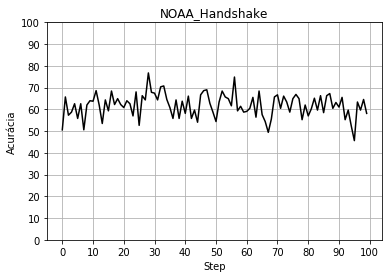

Tempo de Execução:  10.816239595413208
memory peak:  146260
Acc:  0.6869073847409222
Macro-F1:  0.4147705712931528
MCC:  0.04129842271706247
Desvio Padrão:  0.0899201515777724
Numero de atualizações:  2


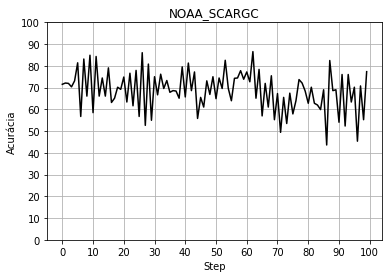

In [11]:
print('Tempo de Execução: ', '19.725157022476196')
print('memory peak: ', '96900')
print('Acc: ', score)
print('Macro-F1: ', '0.6568658116984673')
print('MCC: ', '0.3182225264949419')
print('Desvio Padrão: ', std)
print('Numero de atualizações: ', '71')
plots.plotAcc(acc_percent, 100, 'NOAA_Handshake')

print('Tempo de Execução: ', tempoS)
print('memory peak: ', memS)
print('Acc: ', scoreS)
print('Macro-F1: ', f1S)
print('MCC: ', mccS)
print('Desvio Padrão: ', stdS)
print('Numero de atualizações: ', updtS)
plots.plotAcc(acc_percentScargc, 100, 'NOAA_SCARGC')